# Visualizations with Pandas

# 1. Introduction

In Data-Science, it is very important to know-your-data. The first step that you should **always** do is to look at your data.

We can look at the data by calculating its statistics, examining different samples in random, and of course - by visualizing the data.  
Data Visualization might reveal patterns that wouldn't be discovered otherwise.

## 1.1 Goals
In this notebook, you will learn how to plot a given dataframe using Pandas.

## 1.2 Why Pandas?

The [Pandas library's plot method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) is often your first option to create visual insights to better understand your data.  
Its main advantage is simplicity and straightforward methods for data visualization.  

Behind the scenes of plotting with Pandas is another, stronger and more complicated library - [Matplotlib](https://matplotlib.org/) - which we will cover in a later lesson.  
When we call Pandas' plotting functions, [Matplotlib](https://matplotlib.org/) acts as an engine.  
Pandas simplifies the usage of [Matplotlib](https://matplotlib.org/), and supplies a high level code for it.

In their [getting-started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) pandas included also a [section for plotting](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html), which is very recommended to read as well.

We start with importing the Pandas library:

In [2]:
# Import Pandas & Numpy libraries
import pandas as pd
import numpy as np

# For now, we use Matplotlib only to set the size of plots
import matplotlib.pyplot as plt

# rcParams allow us to set the size global to the whole notebook 
plt.rcParams['figure.figsize'] = [10,6]
# In some plots, we define the size within the plotting function


# 2. Loading the Dataset

We will be working with an [occupancy detection](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection) dataset.  
This dataset describes different attributes, which potentially could indicate whether a person is present in a room.  

In [3]:
# Load the data
df_room_occupancy = pd.read_csv('../../../Data/room_occupancy.csv')

In [4]:
# Take a look at the first 10 rows
df_room_occupancy.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
6,2015-02-11 14:53:00,21.7600,31.260000,437.333333,1014.333333,0.005042,1
7,2015-02-11 14:54:00,21.7900,31.197500,434.000000,1018.500000,0.005041,1
8,2015-02-11 14:55:00,21.7900,31.393333,437.333333,1018.666667,0.005073,1
9,2015-02-11 14:55:59,21.7900,31.317500,434.000000,1022.000000,0.005060,1
10,2015-02-11 14:57:00,21.7900,31.463333,437.333333,1027.333333,0.005084,1


In [5]:
# Print number of rows and columns
df_room_occupancy.shape

(9752, 7)

## 2.1 Attributes explanation

Firstly, let's examine what variables we are dealing with.

- ``date``: the specific day and time when the values were recorded 
- ``Temperature``: measured in Celsius
- ``Humidity``: relative humidity - a present state of absolute humidity relative to a
maximum humidity given the same temperature expressed as a percentage
- ``Light``: measured in Lux
- ``CO2``: in ppm (parts per million)
- ``HumidityRatio``: derived quantity from temperature and relative humidity, expressed in kilograms of water vapor per kilogram of dry air  
- ``Occupancy``: the presence of a person in the room. 
The occupancy of the room was obtained from pictures that were taken every minute for a period of 8 days (1 if a person is present, 0 otherwise)

### 2.1.1 - Question #1

**Look at the dataset and think**: 
1. What type of a Machine Learning task is it - *Supervised* or *Unsupervised* learning?
2. Is it a *classification* or a *regression* task?
3. The output is whether a person is present in a room or not. What type of output space is it?  
    A. Binary   
    B. Mutliclass  
    C. Multilabel  

### 2.1.2 Exploring the data
Let's look at the variables data type using
[`.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) attribute.

In [6]:
# Check variables data type
df_room_occupancy.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

There are 6 numerical variables in the dataset. 
Almost all of the variables have been correctly interpreted according to their datatypes, except for the `date` column, which Python recognized as an object. 
Convert this object datatype to the datetime datatype using Pandas.

In [7]:
# Convert the date column to be an actual date using Pandas `to_datetime` method:
df_room_occupancy['date'] = pd.to_datetime(df_room_occupancy['date'])

**Note:** If you know in advance which columns are date-columns, you can skip the conversion by specifying the date columns to be automatically parsed while loading the dataset:
```
df_room_occupancy = pd.read_csv('../../../Data/room_occupancy.csv', parse_dates=['date'])
```

### 2.1.3 Checking and Handling Missing Values

Let's check whether there are some missing values that we need to be aware of.

In [8]:
# Explore descriptive statistics
df_room_occupancy.describe().T

,count,mean,min,25%,50%,75%,max,std
date,9752,2015-02-15 00:03:29.688884224,2015-02-11 14:48:00,2015-02-13 07:25:44.249999872,2015-02-15 00:03:30,2015-02-16 16:41:14,2015-02-18 09:19:00,NaN
Temperature,9752.0,21.001768,19.5,20.29,20.79,21.533333,24.39,1.020693
Humidity,9752.0,29.89191,21.865,26.642083,30.2,32.7,39.5,3.952844
Light,9752.0,123.06793,0.0,0.0,0.0,208.25,1581.0,208.221275
CO2,9752.0,753.224832,484.666667,542.3125,639.0,831.125,2076.5,297.096114
HumidityRatio,9752.0,0.004589,0.003275,0.004196,0.004593,0.004998,0.005769,0.000531
Occupancy,9752.0,0.210111,0.0,0.0,0.0,0.0,1.0,0.407408


In [9]:
# Check missing values
df_room_occupancy.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

# 3. ``plot()`` method

## 3.1 Default plot

The
[`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
method is simply a wrapper around [Matplotlibs](https://matplotlib.org/) plot function that create a
[**lineplot**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html) by default. 
A lineplot plots each data point of a DataFrame and then draws a straight, continuous line connecting these values.

### 3.1.1 - Question #2:
Before moving forward and plotting the default chart, please stop and ponder - or discuss with your group:
- Our dataset represent a room status, minute after minute.  
What type of chart would best describe the data?  
What would you like to see in the *x* and *y* axis? Why?

### 3.1.2 - Quick Data Visualization
If you call
[`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
right onto the DataFrame, all of the numerical features will be plotted. 
This approach is sometimes not quite good as you can see below.  
There are several variables with similar low values, thus they are overlapping.  
In addition, the date column disrupt the y-axis with year values.

<Axes: >

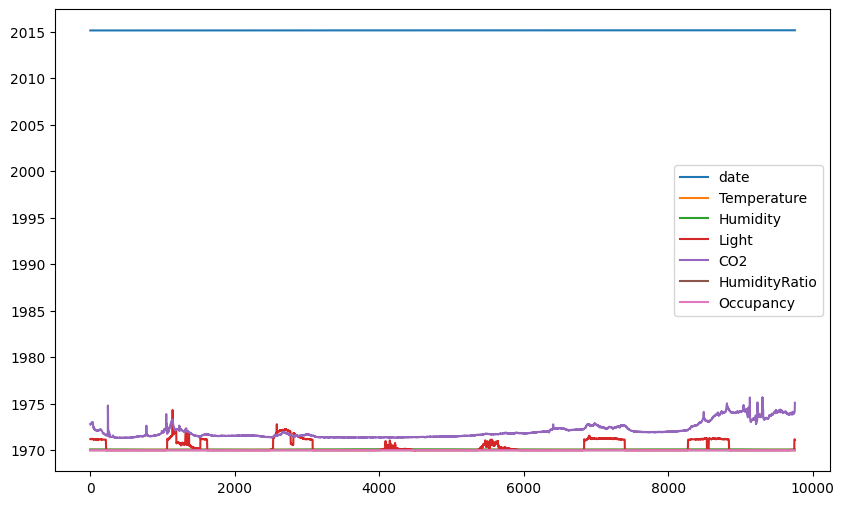

In [10]:
# Create a lineplot of the DataFrame
df_room_occupancy.plot()

Let´s create a violet line plot of variable `Temperature`.  
You can select desired variable by [subsetting](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html) the DataFrame with square brackets.

<Axes: >

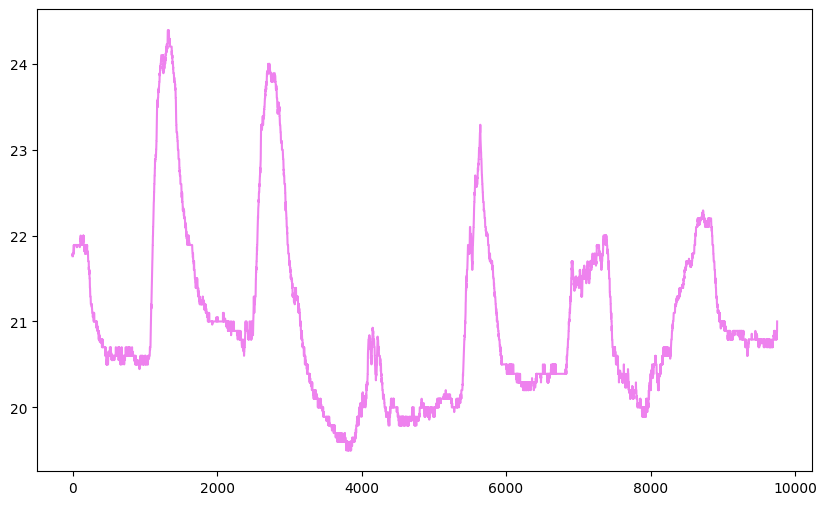

In [11]:
# Create a line plot of Temperature variable 
df_room_occupancy['Temperature'].plot(color = 'violet')

Now only `Temperature` is plotted with its respective values.

#### Extra Enrichment for Advanced - <Axis: >

---

The observant of you might notice that the
[`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
function returns an 
[`<Axes:>`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html) 
object. 

- *What does this mean?*  
For now, remember that each graph is actually represented as a _Figure object_ that serves as the base, and is returned as an output. Onto this base there is an Axes object in which the x-axis and y-axis are created. In the latter section, we will discuss more details about Figures and Axes.  
To avoid displaying this label, you can put a semicolon at the end of the line.

- *Why is it empty?*  
Pandas uses the table index for the x-axes. The index is an easy way to represent - and reach - every row in the table and is used when you subset your table by rows.  
By default, the index of this dataframe is just an ordinal line-numbers (1, 2, 3, ...). They fulfill the index criteria of being unique, and each can represent a specific row in the dataset.  
If we want to use another column to be the x-axis, such as the date, we must either make it an index, or specify the requested axis explicitly by passing it as a parameter to the `plot()` method (coming up in the next section).

Let's see here how to set a column as an index:

In [12]:
df_room_occupancy_date_indexed = df_room_occupancy.set_index('date')
df_room_occupancy_date_indexed

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...
2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1


Now, if we run the exact same default `plot()` method as before on the indexed table, we will see that it uses the `date` as the *x-axis* by default:

<Axes: xlabel='date'>

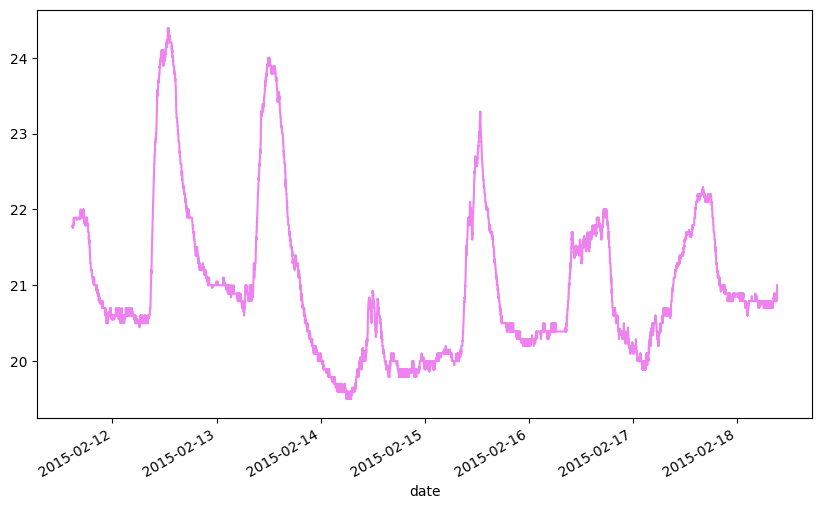

In [13]:
df_room_occupancy_date_indexed['Temperature'].plot(color = 'violet')

---

### 3.1.3 Mutli-Column Visualization

It is also possible to plot multiple columns by subsetting the dataframe with a **list** of respective variables, separated with commas within a square brackets, and then call
[`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

Pandas sets the series colors automatically so that you will be able to distinguish the features. You can manually specify the colors of the lines by using the `color` parameter.  
Chosen colors need to be passed in a [*dictionary*](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). See the following example:

```
subset_columns = ['variable_1', 'variable_2']
df_room_occupancy[subset_columns].plot(color = {'variable_1':'yellow', 'variable_2': 'black'})
```

The legend is then also placed by default. 

### 3.1.4 Question #3
**Try multicolumn visualization yourself in the following task.**

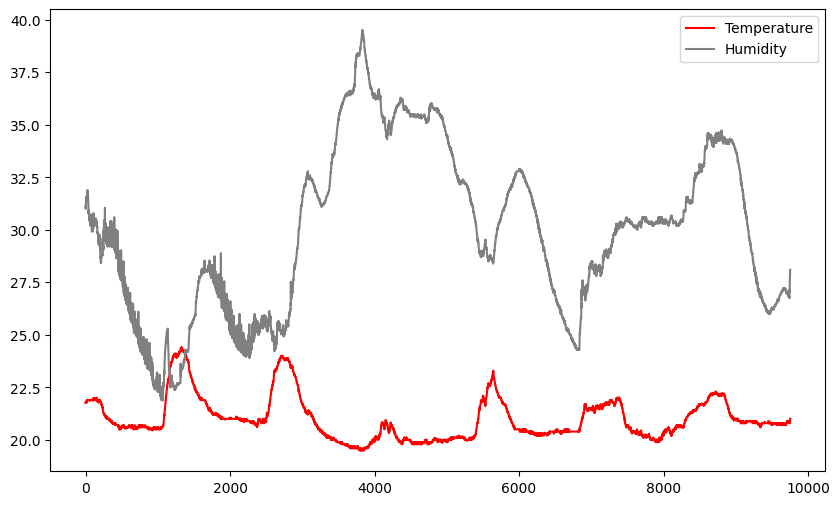

In [14]:
# ************************** Your turn ********************************
# TASK 1 >>> Create a lineplot of variables 'Temperature' and 'Humidity'
#        >>> Set the color of Temperature to red and Humidity to be gray
#        >>> In the created plot, observe how humidity and temperature have been decreasing and increasing


df_room_occupancy[['Temperature','Humidity']].plot(color = {'Temperature':'red', 'Humidity':'gray'});



# ***********************************************************************

## 3.2 Customizing the line plot parameters
The plot method can be quite flexible by setting its parameters. Within the [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method you can set several parameters and affect visualization properties, such as the chart title, the axis labels, the plot size, etc. 

For example, you can plot one column against another, as we see in the example below:  
We specify the `date` feature as the *x-axis* (`x=`) and `CO2` feature as the *y-axis* (`y=`).
For more information about parameter settings take a look at 
[the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

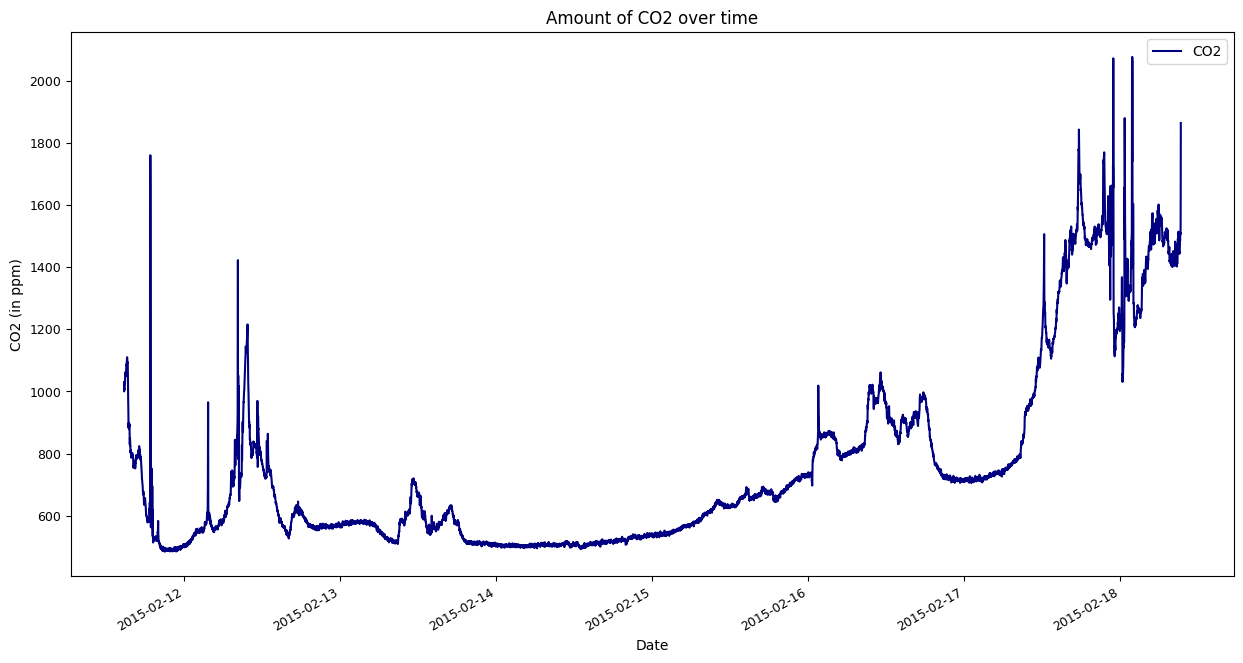

In [15]:
# A lineplot of amount of CO2 per date

df_room_occupancy.plot(x = 'date', y = 'CO2',   # Specifying variabes on the axis
          figsize = (15,8),                     # Setting a Figure display size (requires a tuple: weight, height)
          fontsize = 9,                         # Setting axis ticks font size 
          color = 'navy',                       # Setting a series line color
          title = 'Amount of CO2 over time',    # Setting a title of a plot 
          xlabel = 'Date',                      # Customizing x-axis label (would be the variable name by default)
          ylabel = 'CO2 (in ppm)'               # Customizing y-axis label (would be empty by default)
);

The line plot is showing a trend of CO2 amount over a period of time from 12.02.2015 (Thursday) till 18.02.2015 (Wednesday). It's easy to notice how the amount of CO2 has decreased during the weekend (14.02.2015 - 15.02.2015).

## 3.3 Beyond Line-plots

So far, we use the default [`plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method that creates a **line plot** by default.  
However, **there are many different types of plots**, and we will go in depth of some of them in our upcoming lessons, but for now, let's clarify some of them a bit. 


In pandas, there are two ways to invoke a plot:

1. **By passing its name as the parameter `kind` to the `plot()` method:**  
  You can set a specific plot style out of these 11 styles, by passing their name as a string to the `kind `parameter of `plot()`.  
  - [`line`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html)        - line (default)
  - [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html)        - histogram  
  - [`box`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)          - boxplot  
  - [`bar`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)          - vertical barplot  
  - [`barh`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html)        - horizontal barplot  
  - [`scatter`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)  - scatterplot  
  - [`pie`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)          - pie plot  
  - [`kde`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.ht)            - density plot  
  - [`density`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html)  - density plot  
  - [`area`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html)        - area plot  
  - [`hexbin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html)    - hexagonal bin plot  

2. **Using one of the plot.<*plot_type*> method:**:  
  All of these plots can be created using the corresponding plotting functions, which some also enables passing plot-specific parameters:
  - [`DataFrame.plot.line`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html)
  - [`DataFrame.plot.hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html)
  - [`DataFrame.plot.box`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)
  - [`DataFrame.plot.bar`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)
  - [`DataFrame.plot.barh`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html)
  - [`DataFrame.plot.scatter`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)
  - [`DataFrame.plot.pie`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)
  - [`DataFrame.plot.kde`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.ht)
  - [`DataFrame.plot.density`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html)
  - [`DataFrame.plot.area`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html)
  - [`DataFrame.plot.hexbin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html)

Additionally, to create a histogram (`hist`) or a boxplot (`box`) there are two more plotting functions, directly from the dataframe itself, without `.plot.*`:
[`DataFrame.hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) 
and
[`DataFrame.boxplot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).



Let's take a look:

##### **Passing its name as the parameter `kind` to the `plot()` method**

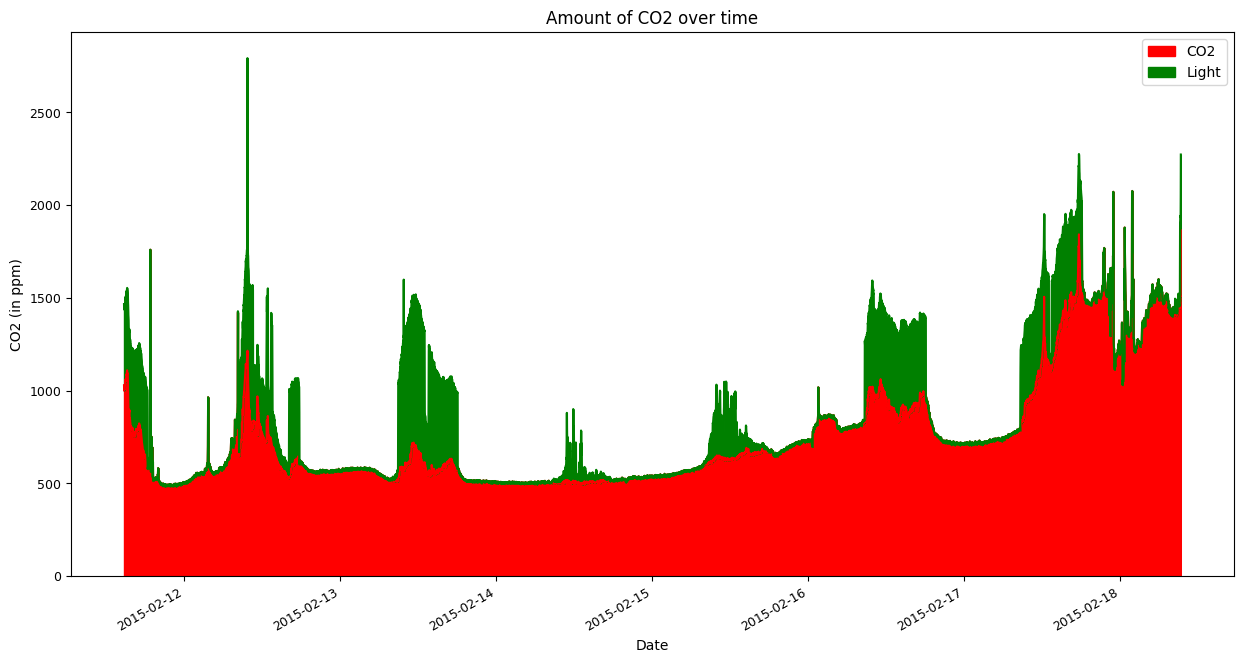

In [16]:
# A lineplot of amount of CO2 per date

df_room_occupancy.plot(
    x = 'date', y = ['CO2', 'Light'],           # Specifying variabes on the axis
    figsize = (15,8),                           # Setting a Figure display size (requires a tuple: weight, height)
    fontsize = 9,                               # Setting axis ticks font size 
    color = {'CO2': 'red', 'Light': 'green'},   # Setting a color per series
    title = 'Amount of CO2 over time',          # Setting a title of a plot 
    xlabel = 'Date',                            # Customizing x-axis label (would be the variable name by default)
    ylabel = 'CO2 (in ppm)',                    # Customizing y-axis label (would be empty by default)

    kind="area",                                # Setting a plot type to be an area plot
    stacked=True                                # Stacking the two series (CO2 and Light) on top of each other                    
);

##### **Using one of the plot.<*plot_type*> method**

Compared to using the [`plot.area`]() method:

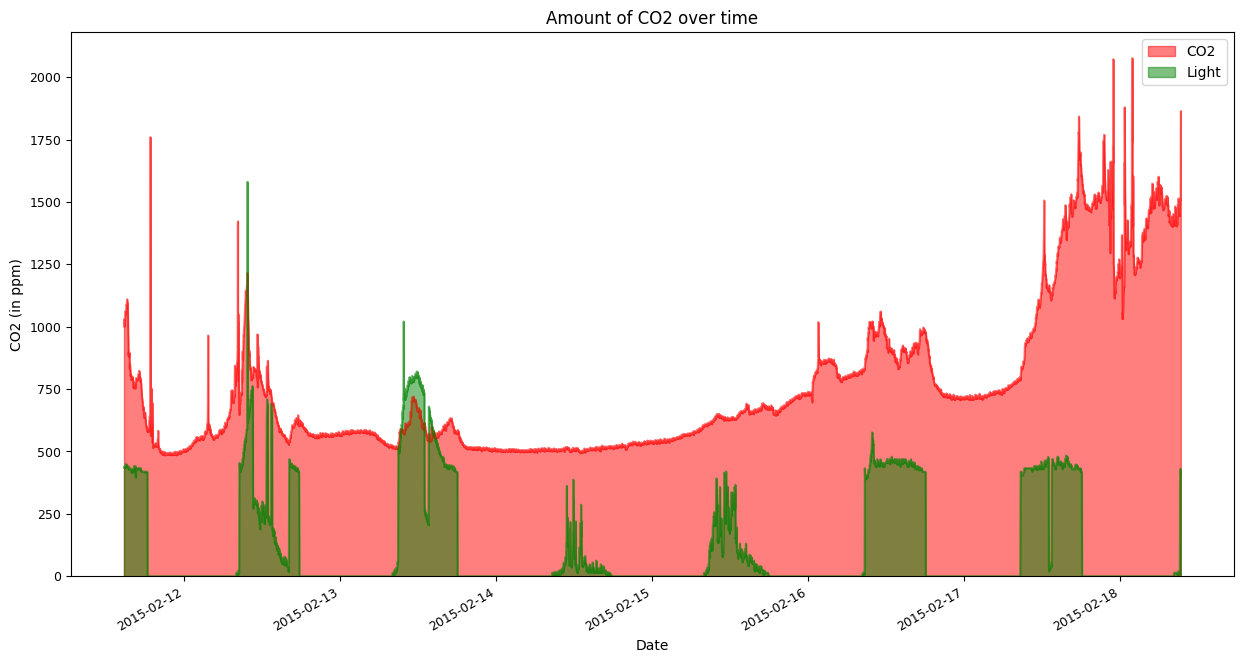

In [17]:
df_room_occupancy.plot.area(
    x = 'date', y = ['CO2', 'Light'],           # Specifying variabes on the axis
    figsize = (15,8),                           # Setting a Figure display size (requires a tuple: weight, height)
    fontsize = 9,                               # Setting axis ticks font size 
    color = {'CO2': 'red', 'Light': 'green'},   # Setting a series line color
    title = 'Amount of CO2 over time',          # Setting a title of a plot 
    xlabel = 'Date',                            # Customizing x-axis label (would be the variable name by default)
    ylabel = 'CO2 (in ppm)',                    # Customizing y-axis label (would be empty by default)
    
    stacked=False                               # Preventing the values to be stacked
);

# 4. Spotlight: Special Plots

## 4.1 Histogram

A histogram is a handy plot to understand the spread of data points. It creates so-called **bins** that you can think of as particular *ranges* of values. Each data point falls into the respective bin according to its value and then the number of data points in each bin are counted. 

Look at some statistics computed on the feature 'HumidityRatio'. We know the lowest and the highest ratio, the average value, and that 50% of values are under 30.0045, etc. But it´s hard to imagine how the distribution of 9752 observations would look like, based on these summary statistics.

In [18]:
# Take a look at the descriptive statistics using .describe()
df_room_occupancy.HumidityRatio.describe()

count    9752.000000
mean        0.004589
std         0.000531
min         0.003275
25%         0.004196
50%         0.004593
75%         0.004998
max         0.005769
Name: HumidityRatio, dtype: float64

Let's create a histogram of the variable `HumidityRatio`. You can use the [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method and specify `kind = "hist"` within this method.  
Again, we select desired column by subsetting the DataFrame. In this case, Pandas does not create an x-axis label.  
Since the [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method returns [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html) object, we have access to Matplotlib capabilities and can specify labels.

[`plt.xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) for the x-axis  
[`plt.ylabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) for the y-axis

Text(0.5, 0, 'Humidity Ratio')

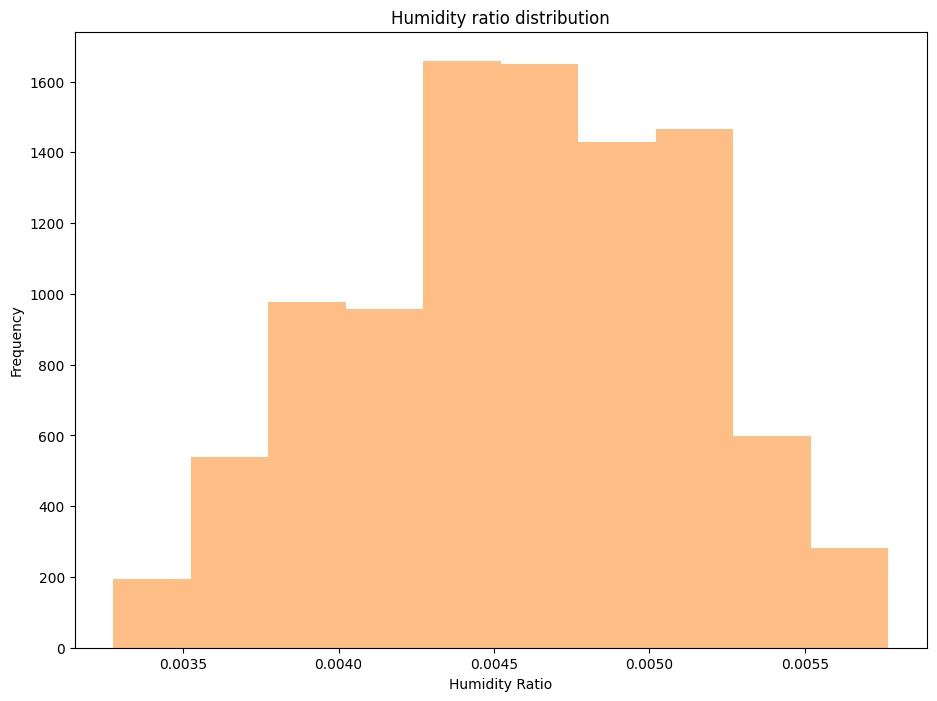

In [19]:
# The Humidity ratio
df_room_occupancy['HumidityRatio'].plot(kind ='hist',
                      figsize = (11,8),
                      color = '#ff7f0e',
                      alpha = .5,                            # Setting the color transparency                
                      title = 'Humidity ratio distribution')

plt.xlabel('Humidity Ratio')                                 # Creating x-axis label

Now we can see all of the 9752 data points plotted in one graph.  
In the resulting graph, we can see how the values are spread across a range from about 0.003 to 0.005.  
Most data points lie in the range of values 0.0043 to 0.0047.

### Question #4
By default, this method separates all of the records into 10 bins. To verify whether our resulting graph accurately reflects the underlying data we should have some fun and try to use different numbers of bins. Using different numbers of bins will change the visual appearance of the histogram.

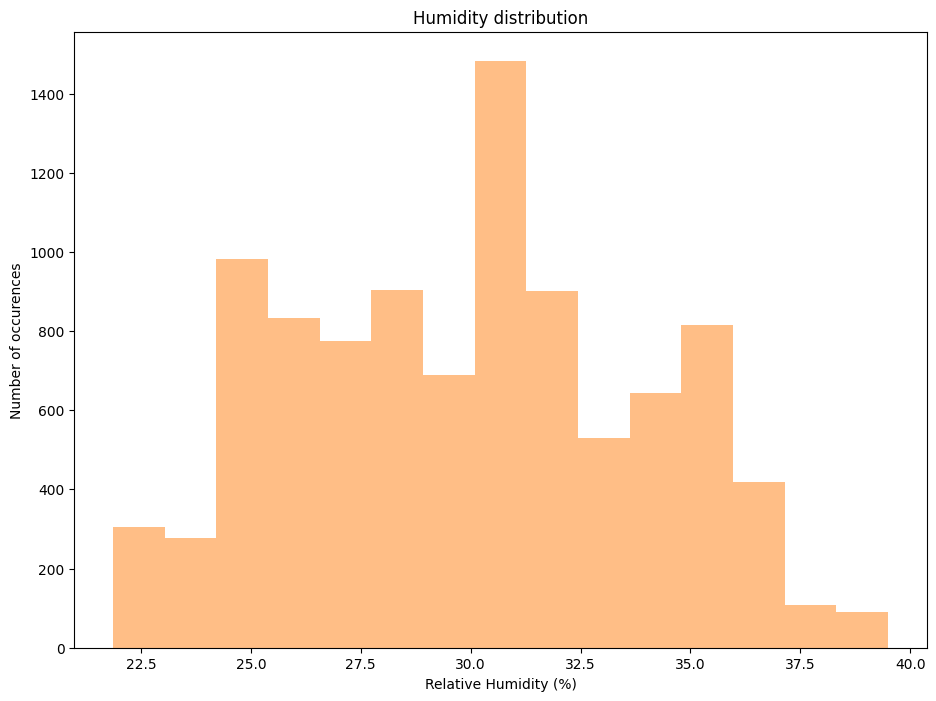

In [20]:
# ************************** Your turn ********************************
# TASK 2 >>> Create a histogram of 'Humidity' in the same way as above
#        >>> Try changing the number of bins (e.g., 5, 20, 50) and observe the outputs 
#        >>> Play around and change the size of the plot and the transparency to see the differences
#        >>> Set the x-axis label to 'Relative Humidity (%)'
#        >>> Change the default y-axis label (Frequency) to 'Number of occurences'


df_room_occupancy['Humidity'].plot(kind ='hist',
                      figsize = (11,8),
                      bins = 15,
                      color = '#ff7f0e',
                      alpha = .5,
                      title = 'Humidity distribution')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Number of occurences');



# ***********************************************************************

By applying [`.hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) to the DataFrame level, we are able to create a histogram of the selected column or columns. It is also posibble to visualize a distribution of all the features of the dataset.

This is a very important tool in the initial exploration of a new dataset.

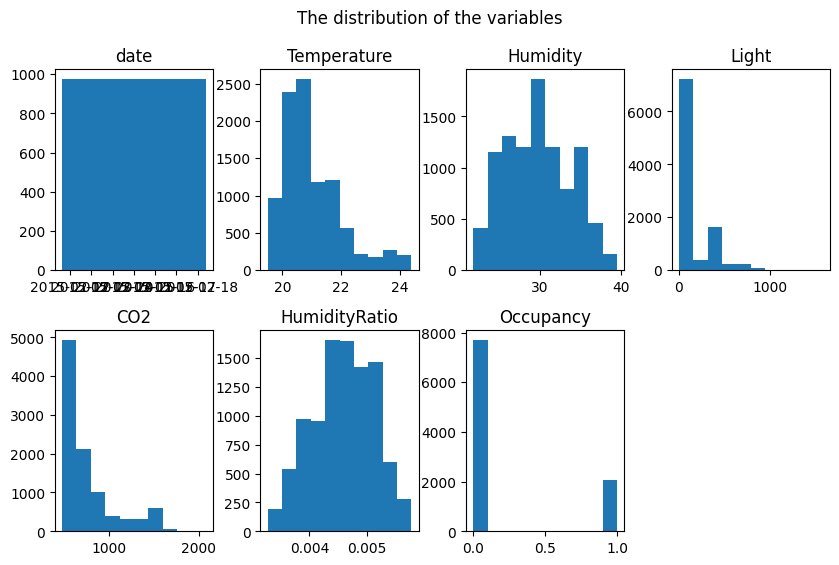

In [21]:
# The data distribution of the whole DataFrame

df_room_occupancy.hist(layout=(2,4), grid = False)       # Setting a layout of 2 rows and 4 column and disabling the grid
plt.suptitle('The distribution of the variables');       # Adding a centered suptitle using Matplotlib

## 4.2 Boxplot (box-and-whisker plot)

Another approach to visualize a variable data distribution with more details is using boxplots.  
The resulting plot will include a [five-number summary](https://en.wikipedia.org/wiki/Five-number_summary), similar to pandas' [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method:

    1. the smallest data point value (min)
    2. the first quartile (1Q)
    3. the median (Q2)
    4. the third quartile (Q3)
    5. and the largest data point value (max). 
    
Boxplots can reveal to us whether there are some possible outliers in the DataFrame and whether the data distribution is skewed or rather symmetrical.

To draw a boxplot you can use the [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method and specifying the `kind` keyword argument as 'box'.  
If we want to customize things such as color, width or style of the line, we can use the `boxprops`, `whiskerprops`, `medianprops` and `capprops` parameters.

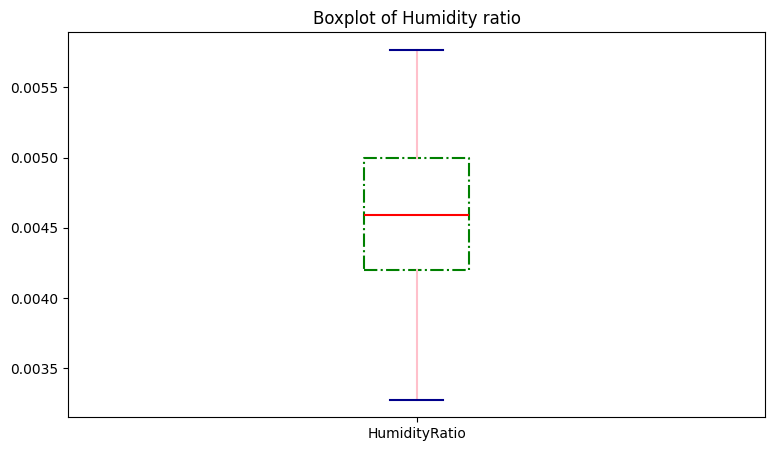

In [22]:
# A boxplot of relative humidity

df_room_occupancy['HumidityRatio'].plot(
    kind = 'box', 
    figsize = (9,5),
    boxprops = dict(linewidth = 1.5, color = 'green',linestyle = '-.'), # Customizing the box
    whiskerprops = dict(linewidth = 1.5, color = 'pink'),               # Customizing the whiskers
    medianprops = dict(linewidth = 1.5, color = 'red'),                 # Customizing median line
    capprops = dict(linewidth = 1.5, color = 'darkblue'),               # Customizing caps on the whiskers
    title = 'Boxplot of Humidity ratio'
);

This boxplot illustrates how the values of the humidity ratio are spread out. Based on the shape it seems that the distribution is rather symetrical and also that there are no extreme values, e.g. outliers. The actual box represent 50% of records along with the median value that is displayed as a red line. 

You can return actual values (of quartiles/percentiles) using the [`.quantile()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html) method.

In [23]:
# Compute 25th percentile, median value and 75th percentile of HumidityRatio variable
perc_25, median, perc_75 = df_room_occupancy.HumidityRatio.quantile([.25,.5,.75])

In [24]:
# Print the output
perc_25, median, perc_75

(0.004196307174011725, 0.0045933097710052, 0.004997965656951225)

Alternatively, you can use Pandas' built-in method [`DataFrame.boxplot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).

The boxplots are especially usefull when comparing two or more groups.  

To illustrate this, Let's look at the *carbon dioxide amount* according to a *person's presence*.  
You can select groups for comparison using the `by` parameter with the respective variable.

We'll adjust the figure size and rename the x-tick labels. The axis grid lines are displayed by default. You can disable showing these lines by setting the parameter `grid = False`.

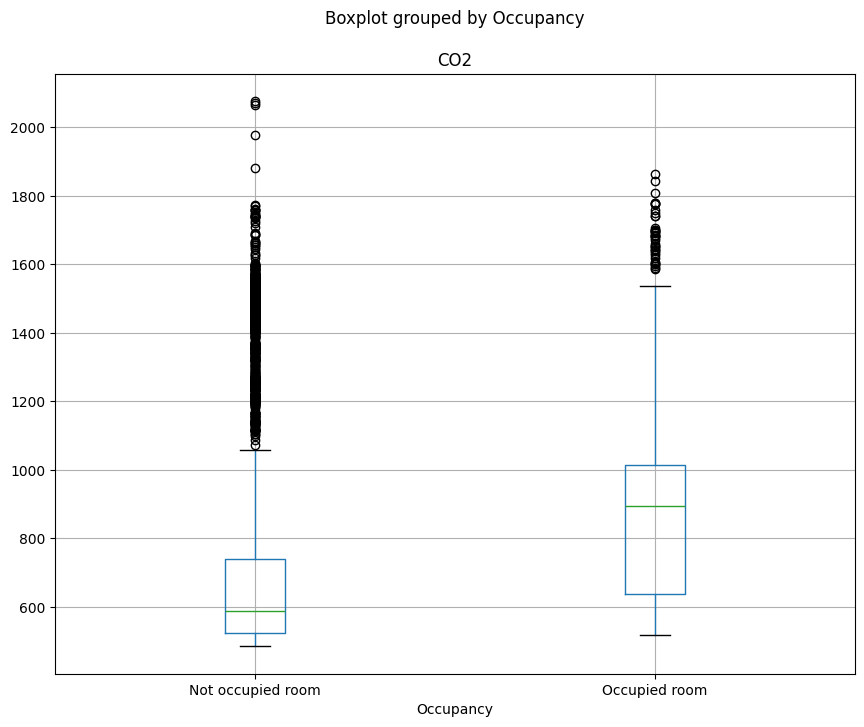

In [25]:
# A boxplot of CO2 by occupancy of the room

df_room_occupancy.boxplot(
    figsize = (10,8),
    column = 'CO2',         # The column values to be plotted
    by = 'Occupancy'        # The variable to group the data by (equivalent to Group By in SQL)
)

# Setting the x-tick labels using Matplotlib
plt.xticks([1,2], ['Not occupied room','Occupied room']);

Comparing the distribution of two groups can helps us to better understand the data.  
From the boxplots you can immediately see the difference in CO2 amounts. When the room is occupied, the amount of carbon dioxide is higher, while 50% of data points have values in the range of about 620 up to slightly above 1000 ppm. Also the median values are completely different. When the room is empty, the amount of carbon dioxide is substantially lower, although plot indicates a lot of outliers.

## 4.3 Bar plot

Bar plots are useful when we want to compare categorical data based on their values. Each category is plotted on the x-axis and the bar heights represent the corresponding values. 

Let's create a simple DataFrame of students and theirs exam scores for illustration.

In [26]:
# Example student exam score data

df_exam_scores = pd.DataFrame({'Student': ['Thomas','Margaret','Lisa','John','Elis','Sally','Marc','Angela','Sebastian'],
                            'Score': [78,50,68,83,99,98,65,90,85],
                            'Class': ['A','B','B','B','A','A','A','B','A']})
df_exam_scores

,Student,Score,Class
0,Thomas,78,A
1,Margaret,50,B
2,Lisa,68,B
3,John,83,B
4,Elis,99,A
5,Sally,98,A
6,Marc,65,A
7,Angela,90,B
8,Sebastian,85,A


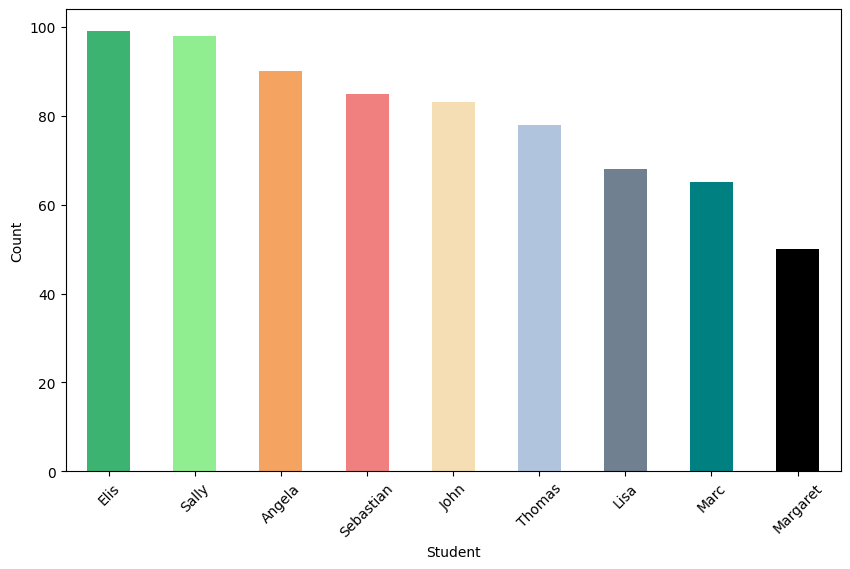

In [27]:
# A vertical barplot of students by their score

df_exam_scores.sort_values(by = 'Score', ascending = False).plot(x = 'Student', 
                                                              y = 'Score',
                                                              kind = 'bar', 
                                                              rot = 45,
                                                              color = ['mediumseagreen','lightgreen','sandybrown',
                                                                      'lightcoral','wheat','lightsteelblue',
                                                                      'slategrey','teal','black'],
                                                              legend = False)
plt.ylabel('Count');

For creating a bar plot, we first sort the values by score in a descending fashion to display student's score.  
If your categories have longer labels, it's appropriate to set rotation `rot` to avoid label overlapping.  
You can explicitly set color of each bar either through specifying the color names, or the hexadecimal color codes to the `color` parameter.

See this [link](https://seaborn.pydata.org/tutorial/color_palettes.html) from Seaborn where the general principles of using color in plots are described. 
___

You can also choose one of the built-in [colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) provided by Matplotlib. Colormaps can be accessed through `plt.cm` (`cm` stands for [colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html)). 
After that, specify a chosen colormap by its name. 
A reversed version of each available colormap can be done by appending `_r`to a colormap's name. 
Using Numpy's `arange()` function we specify an interval of colors we want to select.

### Question #5

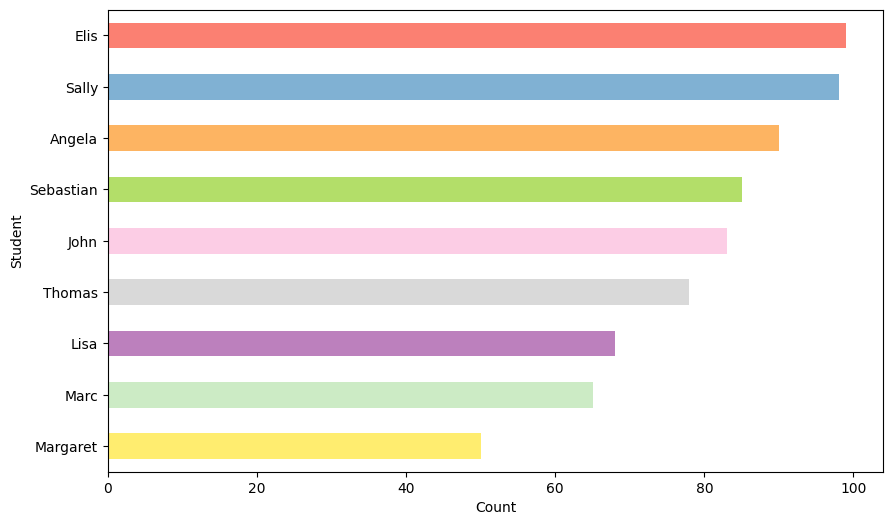

In [58]:
# ************************** Your turn ********************************
# TASK 3 >>> Reuse the code above and create a horizontal barplot (kind = 'barh') of students score
#        >>> Set the colormaps with code: plt.cm.Set3_r(np.arange(len(df_exam_scores)))
#        >>> Disable a legend
#        >>> Set x-axis label to 'Count'

df_exam_scores.sort_values(by = 'Score').plot(x = 'Student', 
                                           y = 'Score',
                                           kind = 'barh', 
                                           color = plt.cm.Set3_r(np.arange(len(df_exam_scores))),
                                           legend = False)
plt.xlabel('Count');




# ***********************************************************************

To visualize the count of students based which class they are in, we count the number of occurences and plot it.

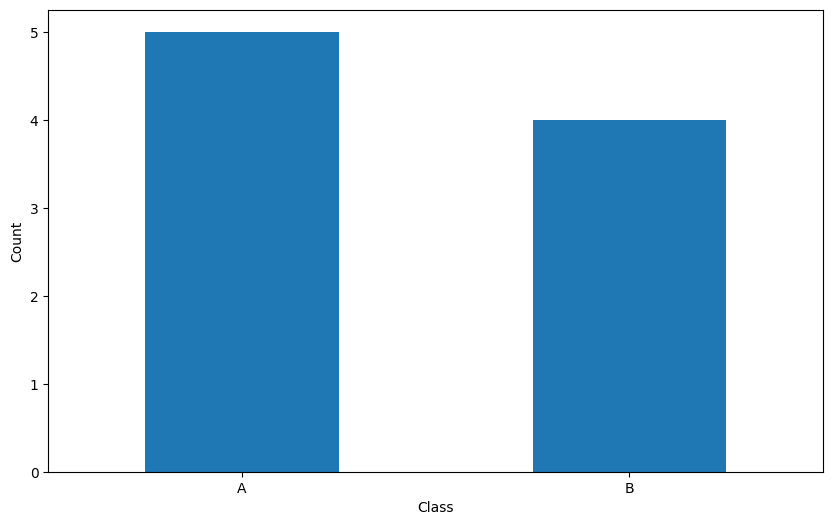

In [29]:
df_exam_scores.Class.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('Class')
plt.ylabel('Count');

# 5. Your turn: Practice time

For the further visualizations we'll use [the obesity level estimation dataset](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition), which is related to habits of individuals in terms of eating habits, transportation and devices they use and attributes of physical condition.

In [30]:
# Read the data
df_obesity = pd.read_csv('../../../Data/obesity_data.csv')

In [31]:
# Take a first look at the data
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## 5.1 Attributes explanation

The first 5 features contain some basic information about individuals along with the information about the presence of overweightedness in a family.  
- `Gender`: the person's gender
- `Age`: their age
- `Height`: height in meters 
- `Weight`: weight in kg 
- `family_history_with_overweight`: whether there are other family members who is/was overweight

Columns related to eating habits:  
- `FAVC`: whether an individual consumes high caloric food frequently
- `FCVC`: how frequently vegetables are used in main meals
- `NCP`: the number of main meals per day
- `CAEC`: consuming any food between main meals
- `SMOKE`: smoking (yes/no)
- `CH2O`: consumption of water per day

Columns related to physical condition:
- `SCC`: caloriy intake tracking
- `FAF`: physical activity frequency
- `TUE`: usage of technological devices per day
- `CALC`: alcohol consumption
- `MTRANS`: Main type of transportation

The last feature `NObeyesdad` was created using the equation for the BMI (Body Mass Index) for each individual. Resulting values were compared with the data provided by the WHO (World Health Organization) and the Mexican Normativity. 

Resulting labels:

- `Underweight` (< 18.5)   
- `Normal` (18.5 - 24.9)   
- `Overweight` (25 - 29.9)  
- `Obesity I` (30 - 34.9)  
- `Obesity II` (35 - 39)  
- `Obesity III` (> 40)

### 5.1.1 Exploring the data

In [32]:
# Check the column's data type
df_obesity.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [33]:
# Explore descriptive statistics
df_obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [34]:
# Check missing values
df_obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [35]:
# Count the number of duplicated rows
df_obesity.duplicated().sum()

np.int64(24)

In [36]:
# Remove duplicated rows
df_obesity.drop_duplicates(inplace = True)

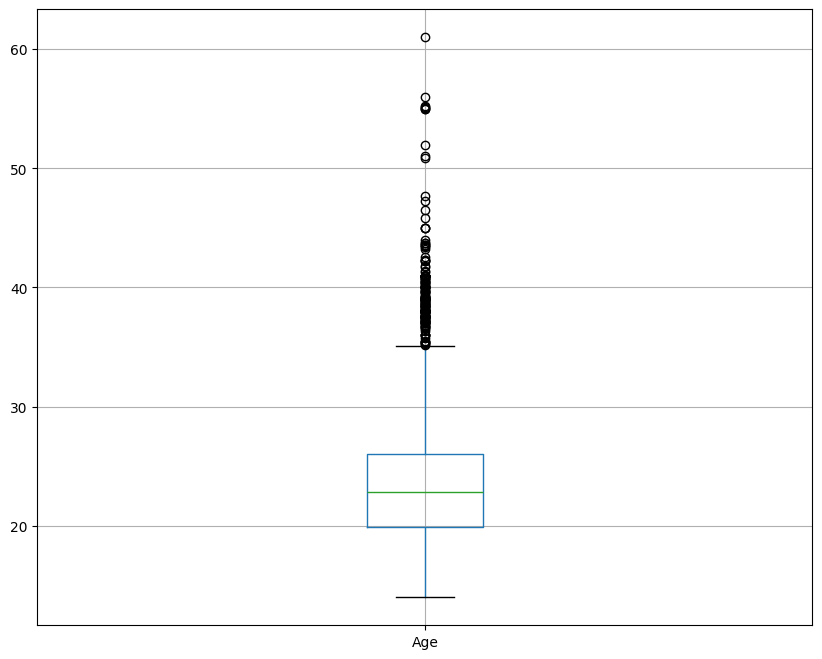

In [37]:
# ************************** Your turn ********************************
# TASK 4 >>> Create a boxplot of the 'Age' feature
#        >>> Set the size of the plot to (10,8)


df_obesity.boxplot(column = 'Age',
                figsize = (10,8));



# ***********************************************************************

> What can you say about the distribution of ages?  
> How old is the majority of people?  
> Is the distribution symmetrical or are there people who are older compared to the majority?

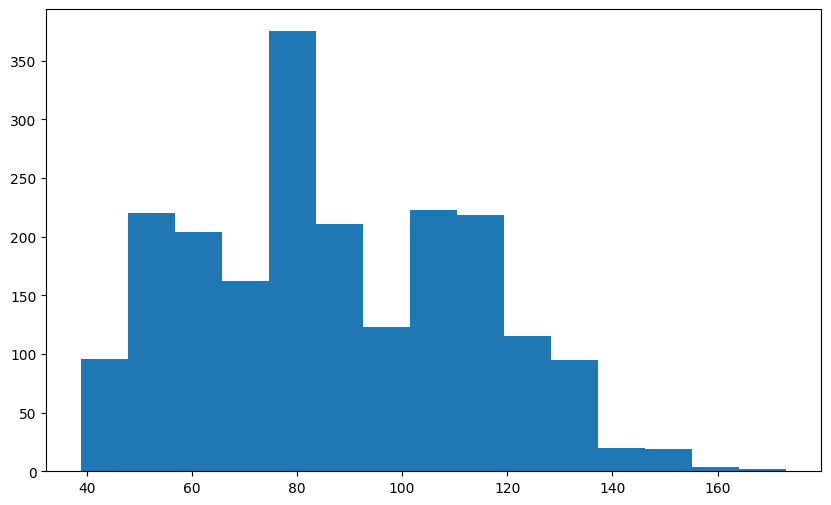

In [38]:
# ************************** Your turn ********************************
# TASK 5 >>> Visualize the distribution of the 'Weight' feature using a histogram
#        >>> Disable the grid lines
#        >>> Set different numbers of bins


df_obesity.Weight.hist(bins = 15, 
                    grid = False);



# ***********************************************************************

> Based on the histogram, what is the most common weight?  
> Does this distribution look symmetrical, or rather bimodal?  
> Could a different number of bins reflect the data better?

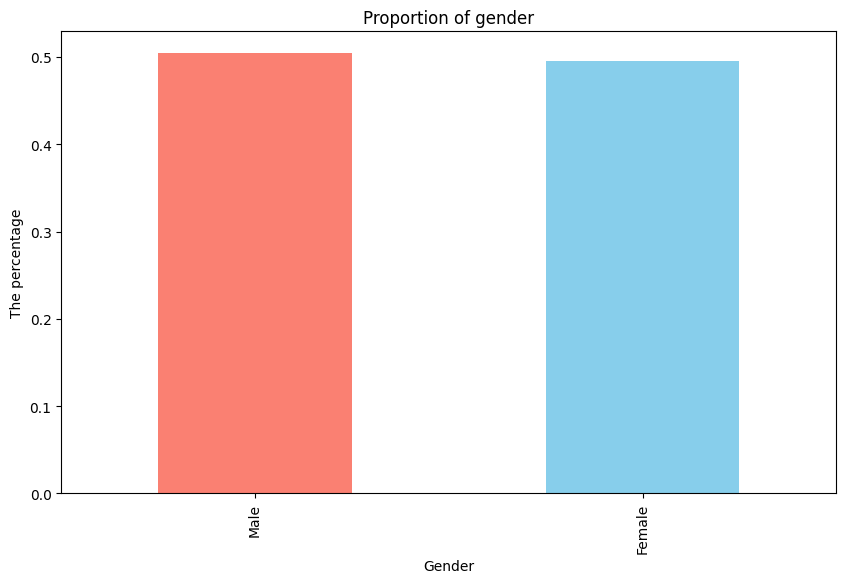

In [39]:
# ************************** Your turn ********************************
# TASK 6 >>> Create a normalized barplot of 'Gender' 
#        >>> Specify the parameter normalize = True to get percentages instead of counts
#        >>> Assign different colors to male and female (male to 'salmon', female to 'skyblue')
#        >>> Add title: 'Proportion of gender'
#                x-axis label: 'Gender' 
#                y-axis label: 'The percentage'



df_obesity.Gender.value_counts(normalize = True).plot(kind = 'bar', 
                                                   color = ['salmon','skyblue'], 
                                                   title = 'Proportion of gender')
plt.xlabel('Gender')
plt.ylabel('The percentage');



# ***********************************************************************

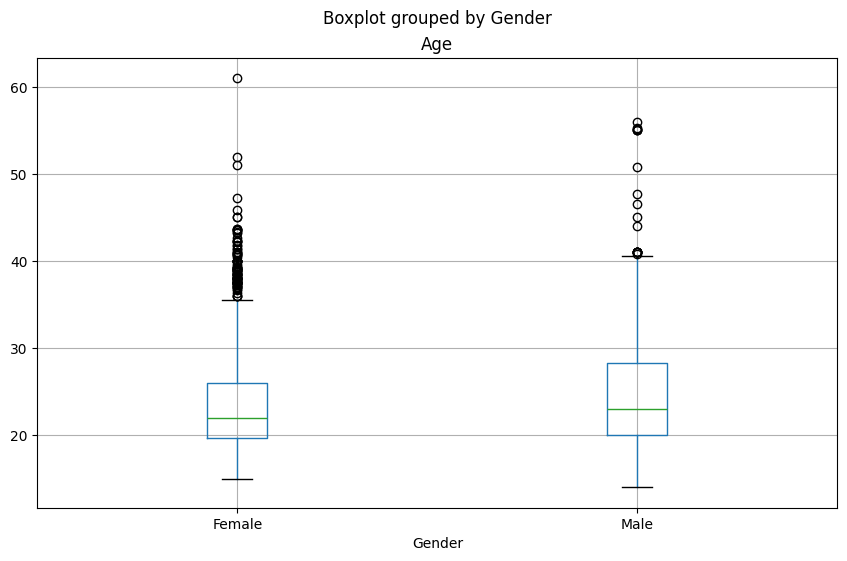

In [40]:
# ************************** Your turn ********************************
# TASK 7 >>> Create boxplots of 'Age' split by gender


df_obesity.boxplot(column = 'Age', 
                by = 'Gender');



# ***********************************************************************

> Compare the ranges of values for male and female: Is the distribution similar or is there some difference? Do you see any outliers?

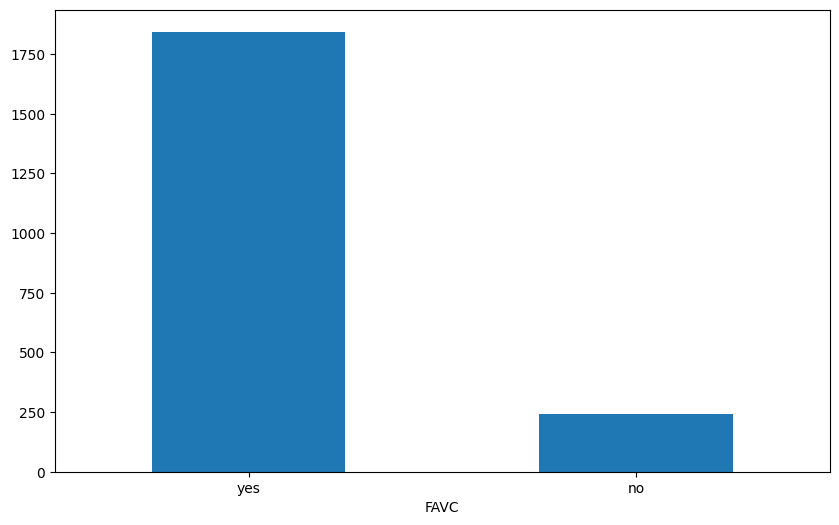

In [41]:
# ************************** Your turn ********************************
# TASK 8 >>> Find out how many people frequently eat high caloric meals ('FAVC')
#        >>> Set rotation of x-ticks to 0 degrees


df_obesity.FAVC.value_counts().plot(kind = 'bar', 
                                 rot = 0);


# ***********************************************************************

The question we might ask regarding obesity levels could be: 
'Which individuals are more likely to be obese based on their age?' or 'Are younger adults overweight?'.

Firstly, let's look how many levels are there. 
We call the
[`.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
method on the `NObeyesdad` column and sort categories based on the obesity level.

In [42]:
# Counting values of the obesity levels
df_obesity.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

Firstly, we define the order of obesity levels in a list and assign it to the variable `obesity_levels`.

In [43]:
# Ordered categories
obesity_levels = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

Then we create a
[`CategoricalDtype`](https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html)
`ob_levels` where we specify categories and orderness.

In [44]:
# Creating CategoricalDtype 
ob_level = pd.api.types.CategoricalDtype(ordered = True, categories = obesity_levels)

The last step is to convert the original data type of the `NObeyesdad` feature to
[`CategoricalDtype`](https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html).

In [45]:
# Converting 'NObeyesdad' to created categoricalDtype
df_obesity.NObeyesdad = df_obesity.NObeyesdad.astype(ob_level)

We can plot obesity levels to see how these vary according to the age of individuals. To avoid overlapping label names of these categories, you can set the rotation of labels to 45 degrees with the `rot` parameter. Also, disabling grid lines can help visualization to be more comprehensible.

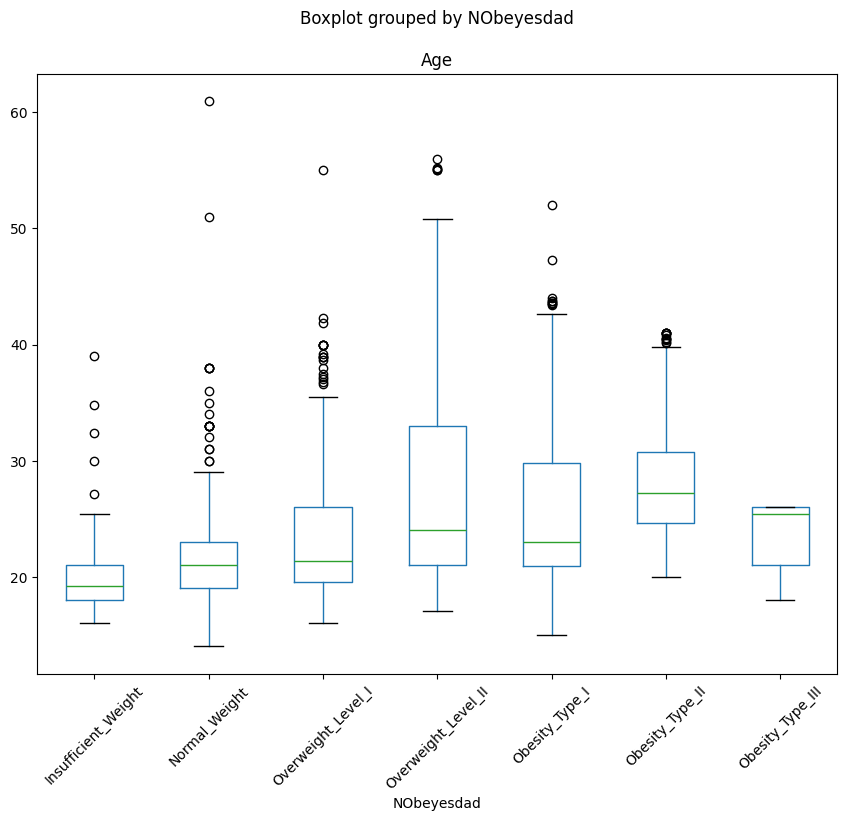

In [46]:
# ************************** Your turn ********************************
# TASK 9 >>> Create a boxplot of the column 'Age' grouped by 'NObeyesdad'
#        >>> Set the figure size to (10,8)
#        >>> Set the labels on x-axis to 45 using the rot parameter
#        >>> Disable the grid lines

df_obesity.boxplot(figsize = (10,8),
                column = 'Age', 
                by = 'NObeyesdad',
                rot = 45, 
                grid = False);


# ***********************************************************************

> Looking at the created plot, can you see some pattern? At what ages do people tend to suffer from some kind of obesity level?

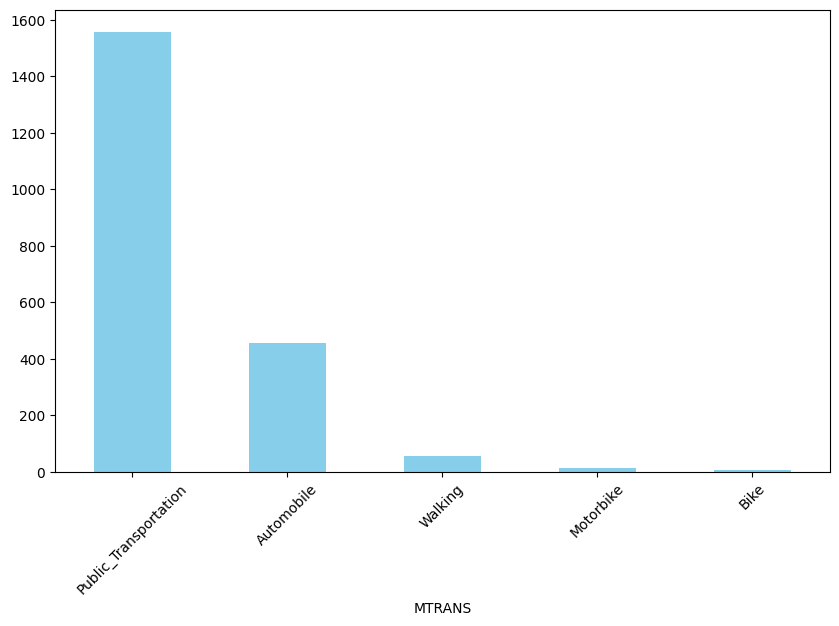

In [47]:
# ************************** Your turn ********************************
# TASK 10 >>> Create a bar plot of 'the MTRANS' feature to find out how many people use a certain kind of transportation
#         >>> Set the labels on the x-axis to 45 using rot parameter
#         >>> Set the color to 'skyblue'
#         >>> What is the most popular kind of transportation? 


df_obesity.MTRANS.value_counts().plot(kind='bar', 
                                   rot = 45, 
                                   color = 'skyblue');


# ***********************************************************************

Let's filter only those individuals who use an automobile for transportation or who walk. Then we will look at their weight.

In [48]:
# Filter only those rows where transportation kind is 'Automobile' and 'Walking'
# DataFrame.query will be explained more in a later notebook, so don't worry about it now
subset_transport = df_obesity.query('MTRANS in ["Automobile","Walking"]')

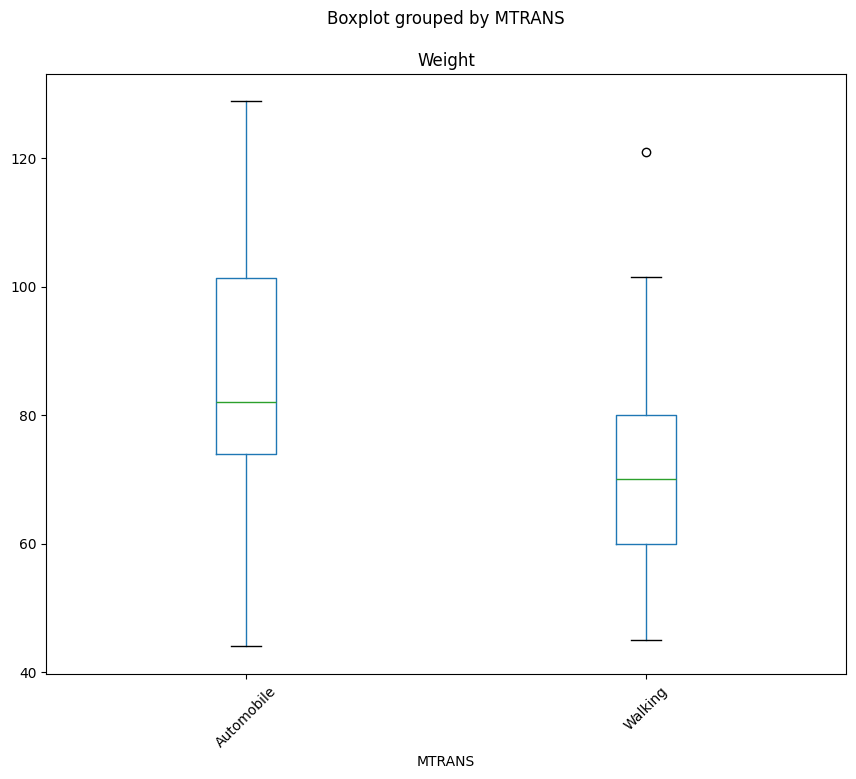

In [49]:
# ************************** Your turn ********************************
# TASK 11 >>> Create a boxplot of the newly created subset_transport DataFrame
#         >>> Set the figure size to (10,8)
#         >>> Set 'Weight' as the column parameter and 'MTRANS' as the by parameter
#         >>> Set the labels on the x-axis to 45 using the rot parameter
#         >>> Disable the grid lines


subset_transport.boxplot(figsize = (10,8),
                         column = 'Weight', 
                         by = 'MTRANS',
                         rot = 45, 
                         grid = False);



# ***********************************************************************

> What can you say about the distribution of these two groups of people?  
> Which group has a lower weight overall? Looking at the boxplots, I think this is a motivation for all of us to consider the type of transportation next time we need to go somewhere :)

## 6. Bonus: Extra Enrichment - Scatter Matrix Plot

a [Scatter Matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html#pandas.plotting.scatter_matrix) is an easy way to get a quick understanding of the relations between the different data variables. It allows us to see if they correlate to each other, oppose to each other, or have no correlation at all - and basically are completely random.

We can also set the chart type in the diagonal - which can either be a `hist`ogram or a `kde` chart. 

Please consider using it as your first To-Go method when you get a new dataset. Here's an example how to use it:

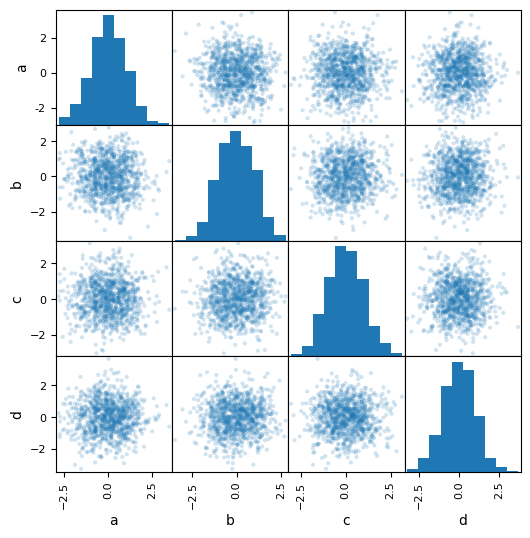

In [50]:
from pandas.plotting import scatter_matrix

df_random_data = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])
scatter_matrix(df_random_data, alpha=0.2, figsize=(6, 6), diagonal="hist");


# 7. Summary

- One of the **first steps** data scientist do when getting a new dataset is **looking at the data**. 
- **Visualization** is an excellent way to **gain a deeper understanding** of the data in hand.  
- Pandas allows us to create visualization quickly, and it is very flexible in the visualization types and their customization.

### Citation request:
Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models. Luis M. Candanedo, Véronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.

Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.

Material adapted for RBI internal purposes with full permissions from original authors.